In [13]:
import numpy as np
import sklearn
import pandas as pd
from scipy.sparse import coo_matrix
import wandb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [14]:
# Load data
data = np.loadtxt('train.sparseX')
y_train = np.loadtxt('train.RT')

data_dev = np.loadtxt('dev.sparseX')
y_dev = np.loadtxt('dev.RT')

In [15]:
# Preprocess Sparse matrix into Coordinate list matrix
# from scipy.sparse import coo_matrix

# Split data apart
rows = data[:, 0].astype(int)
cols = data[:, 1].astype(int)
vals = data[:, 2].astype(int)

# Build matrix
row_len = rows.max() + 1
col_len = 75000
# col_len = cols.max() + 1

sparse_matrix = coo_matrix((vals, (rows, cols)), shape=(row_len, col_len))

print(sparse_matrix.shape)

# Split dev data apart
rows_dev = data_dev[:, 0].astype(int)
cols_dev = data_dev[:, 1].astype(int)
vals_dev = data_dev[:, 2].astype(int)

# Build dev matrix
row_len_dev = rows_dev.max() + 1
col_len_dev = cols_dev.max() + 1
sparse_matrix_dev = coo_matrix((vals_dev, (rows_dev, cols_dev)), shape=(row_len_dev, col_len_dev))

print(sparse_matrix_dev.shape)

(53445, 75000)
(53379, 75000)


In [19]:
# Linear regression

# Weight and Biases, start run with init, log with config
wandb.init(
    project="linear_regression_experiments",
    config={
        "model_type": "LinearRegression",
        "description": "Baseline linear regression",
    }
)

# Train linear regression
linear_regression = LinearRegression()
linear_regression.fit(sparse_matrix, y_train)

y_dev_pred = linear_regression.predict(sparse_matrix_dev)


# Evaluate performance
mse = mean_squared_error(y_dev, y_dev_pred)
r2 = r2_score(y_dev, y_dev_pred)

# Log to wandb
wandb.log({"mse": mse, "r2_score": r2})
wandb.finish()

Linear Regression MSE on dev: 42.63337196650411


mse,▁
r2_score,▁
mse,42.63337
r2_score,-24.28421


In [20]:
# Ridge regression

# Hyperparameter
alpha = 175

# Weight and Biases, start run with init, log with config
wandb.init(
    project="linear_regression_experiments",
    config={
        "model_type": "Ridge",
        "description": "Ridge regression",
        "alpha": alpha,
    }
)

# Train ridge regression
ridge_regression = Ridge(alpha=alpha)
ridge_regression.fit(sparse_matrix, y_train)

y_dev_pred = ridge_regression.predict(sparse_matrix_dev)

# Evaluate performance
mse = mean_squared_error(y_dev, y_dev_pred)
r2 = r2_score(y_dev, y_dev_pred)

# Log to wandb
wandb.log({"mse": mse, "r2_score": r2})
wandb.finish()

Linear Regression MSE on dev: 1.0727005294685845


mse,▁
r2_score,▁
mse,1.0727
r2_score,0.36382


In [21]:
# Lasso regression

# Hyperparameter
alpha = .1

# Weight and Biases, start run with init, log with config
wandb.init(
    project="linear_regression_experiments",
    config={
        "model_type": "Lasso",
        "description": "Lasso regression",
        "alpha": alpha,
    }
)

# Train ridge regression
lasso_regression = Lasso(alpha=alpha)
lasso_regression.fit(sparse_matrix, y_train)

y_dev_pred = lasso_regression.predict(sparse_matrix_dev)

# Evaluate performance
mse = mean_squared_error(y_dev, y_dev_pred)
r2 = r2_score(y_dev, y_dev_pred)

# Log to wandb
wandb.log({"mse": mse, "r2_score": r2})
wandb.finish()

Linear Regression MSE on dev: 1.6178681711236962


mse,▁
r2_score,▁
mse,1.61787
r2_score,0.0405


In [ ]:
# Random Forest

# Hyperparameter
n_estimators = 100
max_depth = 15
random_state = 42

# Weight and Biases, start run with init, log with config
wandb.init(
    project="ml_final_project",
    config={
        "model_type": "Random Forest",
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "random_state": random_state,
    }
)

# Train ridge regression
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
random_forest.fit(sparse_matrix, y_train)

y_dev_pred = random_forest.predict(sparse_matrix_dev)

# Evaluate performance
mse = mean_squared_error(y_dev, y_dev_pred)
r2 = r2_score(y_dev, y_dev_pred)

# Log to wandb
wandb.log({"mse": mse, "r2_score": r2})
wandb.finish()

In [16]:
# Hyperparameters
hidden_layer_sizes = (100, 100, 100, 100)
activation = 'relu'
learning_rate_init = 0.001
alpha = 0.001
early_stopping = True
solver = 'adam'

# Start a new wandb run
wandb.init(
    project="ml_final_project",
    config={
        "model_type": "MLPRegressor",
        "hidden_layer_sizes": hidden_layer_sizes,
        "activation": activation,
        "learning_rate_init": learning_rate_init,
        "alpha": alpha,
        "early_stopping": early_stopping,
        "solver": solver,
    }
)

# Create and train the MLPRegressor
nueral_network = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation,
                    learning_rate_init=learning_rate_init,
                    alpha=alpha,
                    early_stopping=early_stopping,
                    solver=solver)

nueral_network.fit(sparse_matrix, y_train)

# Predict
y_dev_pred = nueral_network.predict(sparse_matrix_dev)

# Evaluate performance
mse = mean_squared_error(y_dev, y_dev_pred)
r2 = r2_score(y_dev, y_dev_pred)

# Log to wandb
wandb.log({"mse": mse, "r2_score": r2})

# Finish the run
wandb.finish()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: israelavendanojr (israelavendanojr-western-washington-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


mse,▁
r2_score,▁
mse,0.77003
r2_score,0.54332


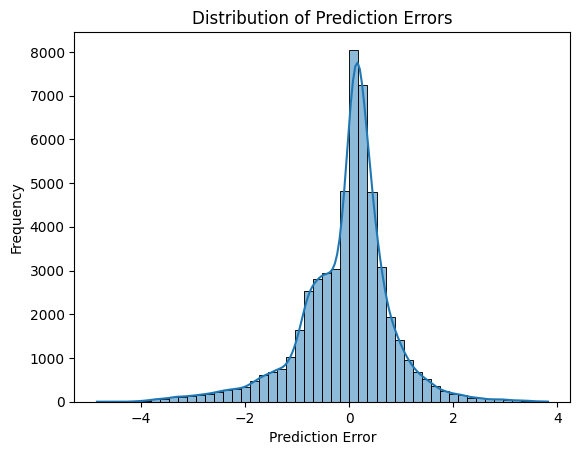

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

errors = y_dev - y_dev_pred
sns.histplot(errors, bins=50, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.savefig("error_distribution.png")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.3, 0.6],
}

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_grid,
                                   n_iter=20,  # number of random combos
                                   scoring='neg_mean_squared_error',
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

random_search.fit(sparse_matrix, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best MSE (negated):", -random_search.best_score_)

for params in ParameterGrid(param_grid):
    wandb.init(project="ml_final_project", config=params)
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(sparse_matrix, y_train)
    preds = model.predict(sparse_matrix_dev)
    mse = mean_squared_error(y_dev, preds)
    wandb.log({"mse": mse})
    wandb.finish()


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
sweep_config = {
    'method': 'random',
    'metric': {
        'name': 'mse',
        'goal': 'minimize'
    },
    'parameters': {
        'hidden_layer_sizes': {
            'values': [(100,), (100, 100), (100, 100, 100), (100, 100, 100, 100)]
        },
        'activation': {
            'values': ['relu', 'tanh']
        },
        'learning_rate_init': {
            'min': 0.0001,
            'max': 0.01
        },
        'alpha': {
            'values': [0.0001, 0.001, 0.01]
        },
        'solver': {
            'values': ['adam', 'sgd']
        }
    }
}




In [ ]:
def train():
    wandb.init()
    config = wandb.config

    model = MLPRegressor(
        hidden_layer_sizes=config.hidden_layer_sizes,
        activation=config.activation,
        learning_rate_init=config.learning_rate_init,
        alpha=config.alpha,
        solver=config.solver,
        early_stopping=True,
    )

    model.fit(sparse_matrix, y_train)
    y_dev_pred = model.predict(sparse_matrix_dev)

    mse = mean_squared_error(y_dev, y_dev_pred)
    r2 = r2_score(y_dev, y_dev_pred)

    wandb.log({"mse": mse, "r2_score": r2})
    wandb.finish()


In [ ]:
sweep_id = wandb.sweep(sweep_config, project="ml_final_project")
wandb.agent(sweep_id, function=train, count=30)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: h2hgtkd6
Sweep URL: https://wandb.ai/israelavendanojr-western-washington-university/ml_final_project/sweeps/h2hgtkd6


wandb: Agent Starting Run: 1si89ip1 with config:
wandb: 	activation: relu
wandb: 	alpha: 0.0001
wandb: 	hidden_layer_sizes: [100]
wandb: 	learning_rate_init: 0.004668727459838259
wandb: 	solver: sgd
wandb: Currently logged in as: israelavendanojr (israelavendanojr-western-washington-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


mse,▁
r2_score,▁
mse,0.88643
r2_score,0.47429


wandb: Agent Starting Run: gyei1yyn with config:
wandb: 	activation: relu
wandb: 	alpha: 0.0001
wandb: 	hidden_layer_sizes: [100, 100, 100, 100]
wandb: 	learning_rate_init: 0.001382992609089358
wandb: 	solver: sgd


mse,▁
r2_score,▁
mse,0.7796
r2_score,0.53765


wandb: Agent Starting Run: na1ucm6b with config:
wandb: 	activation: relu
wandb: 	alpha: 0.0001
wandb: 	hidden_layer_sizes: [100, 100, 100, 100]
wandb: 	learning_rate_init: 0.005878823808179728
wandb: 	solver: adam


mse,▁
r2_score,▁
mse,0.79941
r2_score,0.5259


wandb: Agent Starting Run: r5sj7l4s with config:
wandb: 	activation: tanh
wandb: 	alpha: 0.001
wandb: 	hidden_layer_sizes: [100]
wandb: 	learning_rate_init: 0.00525073736967793
wandb: 	solver: sgd


mse,▁
r2_score,▁
mse,0.82362
r2_score,0.51154


wandb: Agent Starting Run: tqpafspp with config:
wandb: 	activation: relu
wandb: 	alpha: 0.0001
wandb: 	hidden_layer_sizes: [100, 100, 100]
wandb: 	learning_rate_init: 0.004797984196594609
wandb: 	solver: sgd


mse,▁
r2_score,▁
mse,0.77906
r2_score,0.53797


wandb: Agent Starting Run: 1ovpsmy4 with config:
wandb: 	activation: tanh
wandb: 	alpha: 0.01
wandb: 	hidden_layer_sizes: [100, 100, 100]
wandb: 	learning_rate_init: 0.0032510884323375274
wandb: 	solver: sgd


mse,▁
r2_score,▁
mse,0.77933
r2_score,0.53781


wandb: Agent Starting Run: cxm3o53x with config:
wandb: 	activation: relu
wandb: 	alpha: 0.001
wandb: 	hidden_layer_sizes: [100, 100]
wandb: 	learning_rate_init: 0.004981946248319302
wandb: 	solver: sgd


mse,▁
r2_score,▁
mse,0.78984
r2_score,0.53158


wandb: Agent Starting Run: ywu4i76a with config:
wandb: 	activation: relu
wandb: 	alpha: 0.01
wandb: 	hidden_layer_sizes: [100, 100, 100]
wandb: 	learning_rate_init: 0.0027717713362478136
wandb: 	solver: adam


mse,▁
r2_score,▁
mse,0.79064
r2_score,0.5311


wandb: Agent Starting Run: zhy2vt6l with config:
wandb: 	activation: tanh
wandb: 	alpha: 0.0001
wandb: 	hidden_layer_sizes: [100, 100, 100, 100]
wandb: 	learning_rate_init: 0.008875210904987064
wandb: 	solver: sgd


mse,▁
r2_score,▁
mse,0.79691
r2_score,0.52739


wandb: Agent Starting Run: 6dg2bnqi with config:
wandb: 	activation: relu
wandb: 	alpha: 0.0001
wandb: 	hidden_layer_sizes: [100, 100, 100, 100]
wandb: 	learning_rate_init: 0.008029262220848063
wandb: 	solver: adam


mse,▁
r2_score,▁
mse,0.77425
r2_score,0.54082


wandb: Agent Starting Run: 9eives0l with config:
wandb: 	activation: relu
wandb: 	alpha: 0.0001
wandb: 	hidden_layer_sizes: [100, 100, 100]
wandb: 	learning_rate_init: 0.005744762873232517
wandb: 	solver: sgd


wandb: Agent Starting Run: ab0r1nj0 with config:
wandb: 	activation: relu
wandb: 	alpha: 0.0001
wandb: 	hidden_layer_sizes: [100, 100, 100]
wandb: 	learning_rate_init: 0.007545361072505586
wandb: 	solver: sgd


wandb: Ctrl + C detected. Stopping sweep.
